In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
np.random.seed(42)

data = {
    "Humidity": np.random.randint(20, 100, 200),       # %
    "WindSpeed": np.random.randint(1, 40, 200),        # km/h
    "Pressure": np.random.randint(980, 1040, 200),     # hPa
}

df = pd.DataFrame(data)

# Synthetic temperature formula
df["Temperature"] = 0.5 * df["Humidity"] - 0.2 * df["WindSpeed"] + 0.3 * df["Pressure"] + np.random.randint(-10, 10, 200)

df.head()


,Humidity,WindSpeed,Pressure,Temperature
0,71,33,1027,339.0
1,34,9,1000,308.2
2,91,6,1018,342.7
3,80,16,1015,336.3
4,40,29,1012,325.8


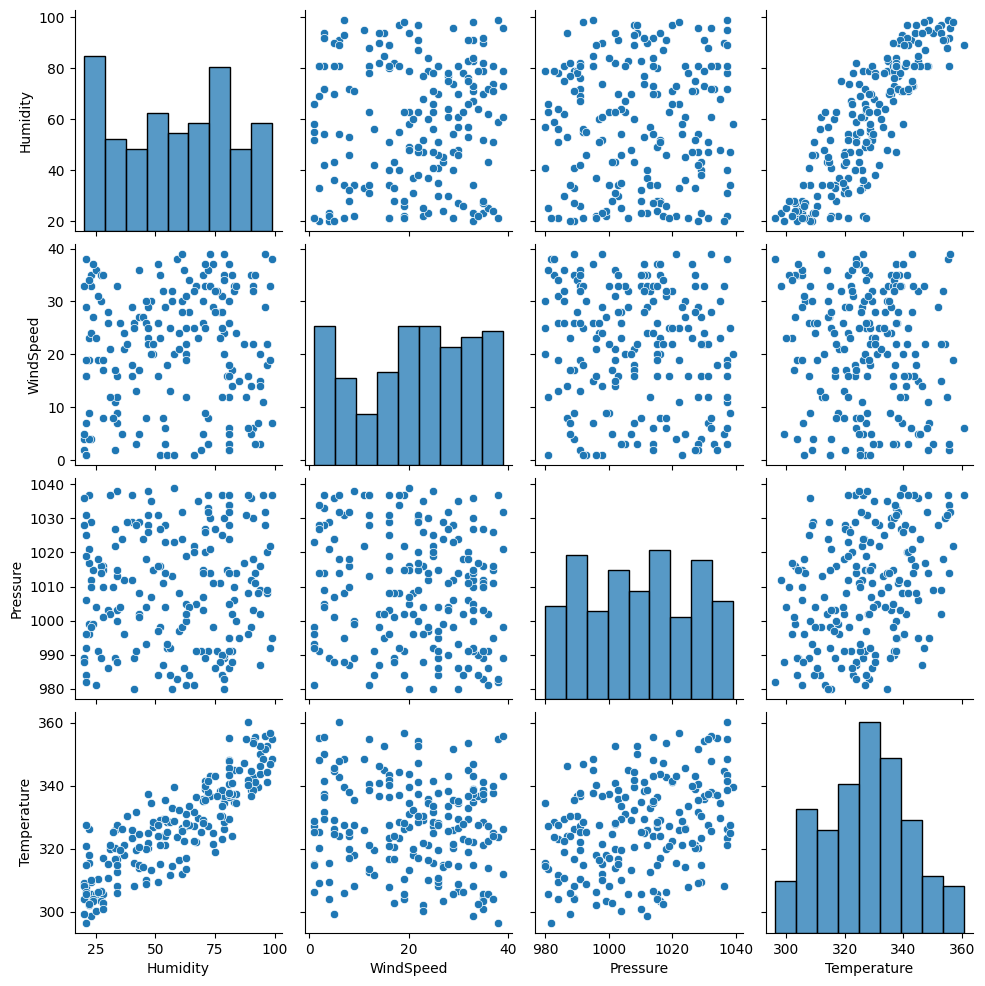

In [ ]:
sns.pairplot(df)
plt.show()


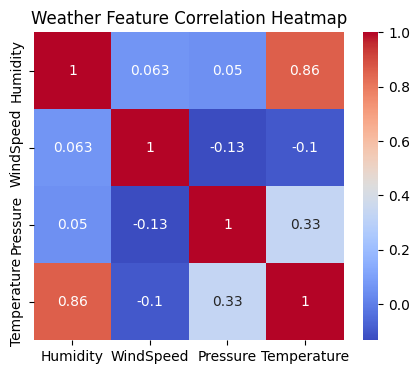

In [ ]:
corr = df.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Weather Feature Correlation Heatmap")
plt.show()


In [ ]:
X = df[['Humidity', 'WindSpeed', 'Pressure']]
y = df['Temperature']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train samples:", X_train.shape)
print("Test samples:", X_test.shape)


Train samples: (160, 3)
Test samples: (40, 3)


In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

print("Model trained successfully 🎉")


Model trained successfully 🎉


In [ ]:
y_pred = model.predict(X_test)

pred_df = pd.DataFrame({
    "Actual Temperature": y_test,
    "Predicted Temperature": np.round(y_pred, 2)
})

pred_df.head()


,Actual Temperature,Predicted Temperature
95,321.1,325.44
15,334.9,337.96
30,327.1,328.38
158,308.9,315.44
128,319.7,316.04


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 4.726902464310067
MSE: 28.57010358356265
RMSE: 5.345100895545626


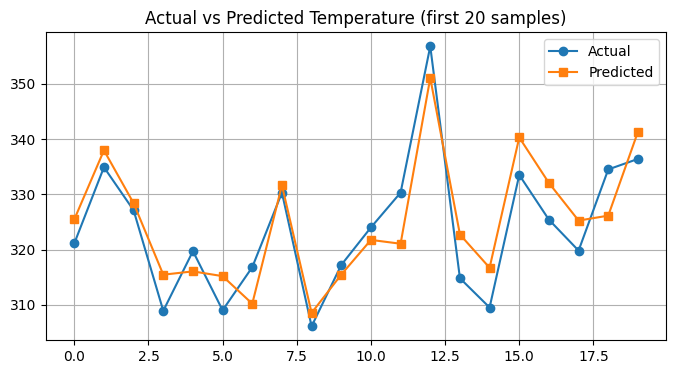

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(y_test.values[:20], label="Actual", marker='o')
plt.plot(y_pred[:20], label="Predicted", marker='s')
plt.title("Actual vs Predicted Temperature (first 20 samples)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# new humidity, windspeed, pressure
new_data = pd.DataFrame({
    "Humidity": [70],
    "WindSpeed": [12],
    "Pressure": [1010]
})

temp_pred = model.predict(new_data)

print("🌦️ Predicted Temperature:", temp_pred[0])


🌦️ Predicted Temperature: 335.0933603441934
